In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from gbd_mapping import causes
from vivarium_inputs import get_measure

In [3]:
dfout = pd.read_hdf(r'../2019_12_16_15_24_27/output.hdf')

In [4]:
#print(dfout.head())
#print(dfout.shape)

In [53]:
#dfout.columns

In [54]:
#df_grpby_draws.filter(regex='prevalent_cases').columns


In [4]:
dfout.reset_index(level='random_seed',inplace=True,drop=True)
#dfout.head()

In [5]:
dfout.reset_index(level='input_draw_number',inplace=True)
#dfout.head()

In [6]:
df_grpby_draws = dfout.groupby('input_draw_number',as_index=False).sum()
#print(df_grpby_draws.head())
print(df_grpby_draws.shape)

(100, 995)


In [55]:
deaths_enceph = df_grpby_draws.filter(regex='input_draw_number|death_due_to_neonatal_encephalopathy')
deaths_enceph.set_index('input_draw_number', inplace=True)
#deaths_enceph.head()

In [56]:
person_time = df_grpby_draws.filter(regex='input_draw_number|person_time')
person_time.set_index('input_draw_number',inplace=True)
#person_time.head()

In [9]:
csmr_enceph_columns = [i.replace('death_due_to','csmr') for i in deaths_enceph.columns]
#csmr_enceph_columns

In [10]:
person_time.columns = deaths_enceph.columns
#person_time.head()

In [11]:
csmr_enceph = deaths_enceph.div(person_time)
csmr_enceph.columns = csmr_enceph_columns
csmr_enceph = csmr_enceph.fillna(0)

In [12]:
#csmr_measles.head()

In [12]:
csmr_mean = csmr_enceph.mean()
csmr_mean= pd.DataFrame(csmr_mean, columns = ['csmr'])
csmr_mean.reset_index(inplace=True)
#csmr_mean

In [19]:
def extract_sex(x):
    sex = x.split('_')[10]
    return sex    

In [48]:
csmr_mean['sex'] = csmr_mean['index'].apply(extract_sex)
#csmr_mean

In [21]:
def extract_age(x):
    age = x.split('age_group_')
    age = ' '.join(age[1].split('_'))
    if age == 'early neonatal':
        age = '0 to 7 days'
    elif age == 'late neonatal':
        age = '7 to 28 days'
    elif age == 'post neonatal':
        age = '28 days to 1 year'
    #print(age)
    return age

In [22]:
csmr_mean['age_group'] = csmr_mean['index'].apply(extract_age)
age_groups = ['0 to 7 days','7 to 28 days','28 days to 1 year', '1 to 4', '5 to 9']
csmr_mean = csmr_mean[csmr_mean.age_group.isin(age_groups)]
#csmr_mean

,index,csmr,sex,age_group
0,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.212398,male,0 to 7 days
1,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.184707,female,0 to 7 days
2,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.005688,male,7 to 28 days
3,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.006357,female,7 to 28 days
4,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.000052,male,28 days to 1 year
5,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.000090,female,28 days to 1 year
6,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.000000,male,1 to 4
7,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.000000,female,1 to 4
8,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.000000,male,5 to 9
9,csmr_neonatal_encephalopathy_due_to_birth_asph...,0.000000,female,5 to 9


In [25]:
csmr_enceph_sim = csmr_mean.loc[:,'csmr':'age_group']
csmr_enceph_sim['sex'] = csmr_enceph_sim['sex'] + ' - Sim'
#csmr_enceph_sim

,csmr,sex,age_group
0,0.212398,male - Sim,0 to 7 days
1,0.184707,female - Sim,0 to 7 days
2,0.005688,male - Sim,7 to 28 days
3,0.006357,female - Sim,7 to 28 days
4,0.000052,male - Sim,28 days to 1 year
5,0.000090,female - Sim,28 days to 1 year
6,0.000000,male - Sim,1 to 4
7,0.000000,female - Sim,1 to 4
8,0.000000,male - Sim,5 to 9
9,0.000000,female - Sim,5 to 9


In [24]:
plt.rcParams["figure.figsize"] = (6,6)

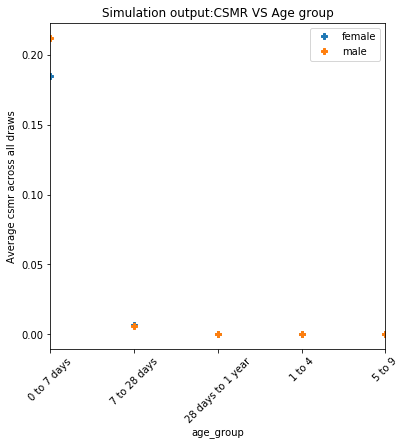

In [26]:
fig, ax = plt.subplots()
csmr_mean.groupby('sex').plot(x='age_group',y='csmr',marker = 'P',linestyle='',ax=ax)
plt.ylabel('Average csmr across all draws')
plt.title("Simulation output:CSMR VS Age group")
plt.xticks(range(5),csmr_mean['age_group'].unique(),rotation=45)
plt.legend([v[0] for v in csmr_mean.groupby('sex')['sex']])

In [27]:
csmr_enceph_ind_act = get_measure(causes.neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma,'cause_specific_mortality_rate','India')

/share/code/kiranklc/miniconda/envs/vivarium/lib/python3.6/site-packages/vivarium_inputs/validation/raw.py:1405: UserWarning: Cause neonatal_encephalopathy_due_to_birth_asphyxia_and_trauma deaths data may violate the following restrictions: yll age restriction .
  warnings.warn(f'{entity.kind.capitalize()} {entity.name} {measure} data may violate the '


________________________________________________________________________________
[Memory] Calling vivarium_gbd_access.gbd.get_codcorrect_draws...
get_codcorrect_draws(cid(382), 163)
____________________________________________get_codcorrect_draws - 15.8s, 0.3min


/share/code/kiranklc/miniconda/envs/vivarium/lib/python3.6/site-packages/vivarium_inputs/validation/raw.py:1858: UserWarning: Data contains additional age groups beyond those specified by restriction range.
  warnings.warn('Data contains additional age groups beyond those specified by restriction range.')
/share/code/kiranklc/miniconda/envs/vivarium/lib/python3.6/site-packages/vivarium_inputs/validation/raw.py:1960: UserWarning: Data was only expected to contain values for age groups between ids 2 and 4 but also included values for age groups {5}.
  warnings.warn(f'Data was only expected to contain values for age groups between ids '


In [28]:
csmr_enceph_ind_act.reset_index(inplace=True)
#csmr_enceph_ind_act.head()

In [29]:
csmr_enceph_2011_2015 = csmr_enceph_ind_act.loc[csmr_enceph_ind_act['year'].apply(lambda x: x.left in [2010,2011,2012,2013,2014,2015]),:]
#csmr_enceph_2011_2015

In [30]:
csmr_enceph_agg_years = csmr_enceph_2011_2015.groupby(['sex','age'],as_index=False).mean()
#csmr_enceph_agg_years

In [31]:
csmr_enceph_agg_years['mean_draws'] = csmr_enceph_agg_years.loc[:,'draw_0':'draw_999'].mean(axis=1)
#csmr_enceph_agg_years[['sex','age','mean_draws']]

In [32]:
def convert_age_group(x):
    if x.right < 1:
        age_group = str(int(round(x.left*365)))+' to '+str(int(round((x.right)*365)))+' days'
    elif x.right == 1:
        age_group = str(int(round(x.left*365)))+' days to '+str(int(x.right))+' year'
    elif x.right == 125:
        age_group = str(int(round(x.left)))+ ' plus'
    else:
        age_group = str(int(x.left))+' to '+str(int(x.right-1))
    #print(age_group)
    return age_group

In [33]:
csmr_enceph_agg_years['age_group'] = csmr_enceph_agg_years['age'].apply(convert_age_group)
csmr_enceph_agg_years = csmr_enceph_agg_years[csmr_enceph_agg_years.age_group.isin(age_groups)]
csmr_enceph_gbd = csmr_enceph_agg_years.loc[:,['sex','mean_draws','age_group']]
csmr_enceph_gbd['sex'] = csmr_enceph_gbd['sex'].str.lower()

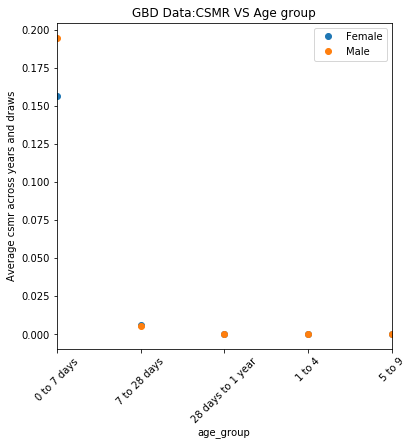

In [34]:
fig, ax = plt.subplots()
csmr_enceph_agg_years.groupby('sex').plot(x='age_group',y='mean_draws',marker='o',linestyle='',ax=ax)
plt.ylabel('Average csmr across years and draws')
plt.title("GBD Data:CSMR VS Age group")
plt.xticks(range(5),csmr_enceph_agg_years['age_group'].unique(), rotation=45)
plt.legend([v[0] for v in csmr_enceph_agg_years.groupby('sex')['sex']])

In [35]:
csmr_enceph_gbd.rename(columns = {'mean_draws':'csmr'},inplace=True)
#csmr_enceph_gbd

In [36]:
csmr_enceph_gbd['sex'] = csmr_enceph_gbd['sex'] +' - GBD'
#csmr_enceph_gbd

In [38]:
csmr_enceph_ind = pd.concat([csmr_enceph_gbd,csmr_enceph_sim], sort=False)
#csmr_enceph_ind

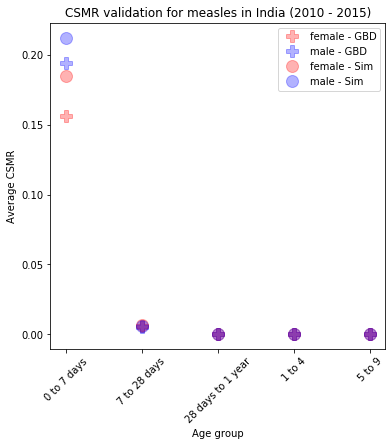

In [39]:
format_dict = {'female - GBD':"rP", 'male - GBD':"bP",'female - Sim':"ro",'male - Sim':"bo"}

fig, ax = plt.subplots()
for form in format_dict:
    df = csmr_enceph_ind[csmr_enceph_ind.sex == form]
    ax.plot(df.age_group,df.csmr, format_dict[form],linestyle='',ms=12,label=form, alpha=0.3)
ax.set_title('CSMR validation for neo in India (2010 - 2015)')    
ax.set_xlabel('Age group')
ax.set_ylabel('Average CSMR')
plt.xticks(rotation=45)
ax.legend()

In [40]:
def convert_age_num(x):
    age_group = x.split()
    if age_group[-1] == 'days':
        age = (int(age_group[0])+int(age_group[2]))/(2*365)
    elif age_group[-1] == 'year':
        age = (int(age_group[0])/365 + int(age_group[3]))/2
    elif age_group[-1] == 'plus':
        age = (int(age_group[0])+125)/2
    else:
        age = (int(age_group[0]) + int(age_group[2]))/2
    return round(age,2)

In [41]:
csmr_enceph_gbd['mid_age'] = csmr_enceph_gbd['age_group'].apply(convert_age_num)
csmr_enceph_gbd['sex'] = csmr_enceph_gbd['sex'].apply(lambda x: x.split('-')[0].rstrip())
#csmr_enceph_gbd

In [42]:
csmr_enceph_sim['mid_age'] = csmr_enceph_sim['age_group'].apply(convert_age_num)
csmr_enceph_sim['sex'] = csmr_enceph_sim['sex'].apply(lambda x: x.split('-')[0].rstrip())
#csmr_enceph_sim

In [43]:
csmr_enceph_scatter = csmr_enceph_gbd[['sex','csmr','mid_age']].merge(csmr_enceph_sim[['sex','csmr','mid_age']], on = ['sex','mid_age'])
#csmr_enceph_scatter

In [44]:
plt.rcParams["figure.figsize"] = (6,6)

In [45]:
import seaborn as sns

Text(0.5, 1.0, 'CSMR from simulation results vs CSMR from GBD data')

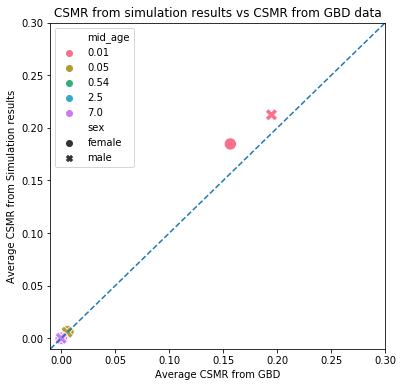

In [47]:
lims = [-0.01,0.3]
ax = sns.scatterplot(x="csmr_x", y="csmr_y", style="sex", hue="mid_age", s= 150, 
                     palette = sns.color_palette('husl',len(csmr_enceph_scatter['mid_age'].unique())),
                     data=csmr_enceph_scatter)

ax.set_xlim(lims)
ax.set_ylim(lims)
ax.plot(lims,lims,'--')
ax.set_xlabel('Average CSMR from GBD')
ax.set_ylabel('Average CSMR from Simulation results')
ax.set_title('CSMR from simulation results vs CSMR from GBD data')